# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

How has the revenue in worldwide from music events changed over last 5 years and in the future?

`imports`, you've seen this before!

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)


In [4]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


In [5]:
# Reading the file and loading data
if os.path.isfile("eservices_event-tickets_music-events_worldwide_AUD_en (1).xlsx"):
    filepath = "eservices_event-tickets_music-events_worldwide_AUD_en (1).xlsx"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
    print("loading from the internet")


loading from file


In [6]:

revenue_df = pd.read_excel(filepath, sheet_name="Global Comparison", skiprows=3, skipfooter=156)
print("done")
revenue_df.tail(5)


done


,Country,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
144,Uruguay,12.43,13.11,13.74,2.09,2.75,13.66,21.12,23.72,25.74,27.15,28.39,29.47
145,Uzbekistan,2.24,1.65,1.86,0.30,0.37,1.73,2.55,2.69,2.77,2.50,2.40,2.28
146,Vietnam,22.20,28.91,40.20,7.82,10.86,46.12,89.46,100.80,108.10,112.70,116.20,119.00
147,Zambia,2.35,2.52,2.56,0.33,0.37,1.70,2.49,2.68,2.81,2.82,2.90,2.96
148,Zimbabwe,2.29,1.72,0.53,0.01,0.01,0.05,0.08,0.09,0.09,0.13,0.13,0.14


In [7]:
pen_df = pd.read_excel(filepath, sheet_name="Global Comparison", skiprows=157, skipfooter=2)
print("done")
pen_df.tail(15)

done


,Country,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
134,Timor-Leste,1.38,1.48,1.59,1.71,1.83,1.94,2.02,2.09,2.13,2.16,2.17,2.19
135,Togo,1.01,1.09,1.18,1.29,1.39,1.48,1.56,1.61,1.64,1.66,1.67,1.68
136,Tunisia,2.19,2.30,2.43,2.59,2.74,2.87,2.96,3.01,3.04,3.06,3.06,3.07
137,Turkey,3.55,3.79,4.08,0.66,0.86,2.99,5.07,5.23,5.28,5.27,5.25,5.23
138,Turkmenistan,1.39,1.45,1.53,1.62,1.70,1.77,1.82,1.84,1.84,1.85,1.85,1.85
139,Uganda,1.02,1.09,1.17,1.26,1.35,1.43,1.49,1.54,1.57,1.59,1.60,1.61
140,Ukraine,1.89,2.00,2.13,2.27,2.41,2.52,2.58,2.61,2.63,2.63,2.63,2.63
141,United Arab Emirates,11.92,12.08,12.34,12.74,13.12,13.27,13.30,13.31,13.31,13.31,13.31,13.31
142,United Kingdom,20.67,21.01,21.42,3.28,4.04,17.25,21.76,21.98,22.02,21.96,21.89,21.81
143,United States,18.34,19.05,19.85,3.12,3.92,13.22,18.79,22.15,22.19,22.10,21.98,21.87


In [8]:
revenue_df.tail(5)


,Country,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
144,Uruguay,12.43,13.11,13.74,2.09,2.75,13.66,21.12,23.72,25.74,27.15,28.39,29.47
145,Uzbekistan,2.24,1.65,1.86,0.30,0.37,1.73,2.55,2.69,2.77,2.50,2.40,2.28
146,Vietnam,22.20,28.91,40.20,7.82,10.86,46.12,89.46,100.80,108.10,112.70,116.20,119.00
147,Zambia,2.35,2.52,2.56,0.33,0.37,1.70,2.49,2.68,2.81,2.82,2.90,2.96
148,Zimbabwe,2.29,1.72,0.53,0.01,0.01,0.05,0.08,0.09,0.09,0.13,0.13,0.14


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [9]:
revenue_df.sample(6)


,Country,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
129,Sweden,319.30,358.40,427.20,71.54,86.70,385.10,587.30,630.30,658.40,676.10,690.70,701.20
14,Bhutan,0.08,0.09,0.11,0.02,0.03,0.14,0.21,0.23,0.25,0.26,0.26,0.27
77,Lesotho,0.41,0.46,0.54,0.08,0.10,0.53,0.81,0.87,0.90,0.93,0.95,0.96
63,Ireland,121.10,134.70,158.70,26.26,31.46,122.00,208.40,221.20,229.70,235.30,240.30,243.80
91,Myanmar,14.10,16.08,18.82,3.26,4.12,19.64,28.96,30.75,31.46,32.19,32.70,33.03
0,Albania,0.55,0.71,0.86,0.15,0.18,0.87,1.30,1.36,1.39,1.39,1.39,1.38


In [10]:
cdf=revenue_df.set_index("Country").T
cdf.head()

Country,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
2017,0.55,14.10,8.06,21.81,0.56,575.9,194.90,4.55,21.84,22.74,...,3.46,15.40,133.10,1483.0,11640.0,12.43,2.24,22.20,2.35,2.29
2018,0.71,16.31,6.56,25.85,0.65,646.3,219.20,5.70,26.87,25.02,...,3.94,16.75,146.00,1677.0,13350.0,13.11,1.65,28.91,2.52,1.72
2019,0.86,20.67,6.01,32.22,0.84,768.8,262.30,7.63,35.15,30.26,...,4.84,21.02,170.00,2013.0,16260.0,13.74,1.86,40.20,2.56,0.53
2020,0.15,3.66,0.79,5.54,0.15,128.3,43.92,1.44,6.47,5.14,...,0.84,3.34,27.93,339.7,2782.0,2.09,0.30,7.82,0.33,0.01
2021,0.18,4.65,1.07,6.77,0.19,154.8,52.82,1.95,8.51,6.32,...,1.07,3.94,33.20,415.7,3450.0,2.75,0.37,10.86,0.37,0.01


In [11]:
tdf=pen_df.set_index("Country").T
tdf.head()

Country,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
2017,1.65,2.23,2.67,1.95,1.80,18.17,15.52,2.30,15.11,0.98,...,1.02,1.89,11.92,20.67,18.34,8.30,0.73,1.54,1.29,1.26
2018,1.73,2.37,2.92,1.98,1.92,18.29,15.88,2.48,15.92,1.01,...,1.09,2.00,12.08,21.01,19.05,8.68,0.77,1.70,1.38,1.34
2019,1.83,2.53,3.22,2.00,2.05,18.45,16.36,2.69,16.89,1.05,...,1.17,2.13,12.34,21.42,19.85,9.15,0.83,1.89,1.49,1.43
2020,1.94,2.72,3.55,0.30,2.20,2.80,2.53,2.92,18.01,1.10,...,1.26,2.27,12.74,3.28,3.12,9.68,0.89,0.32,1.60,1.53
2021,2.04,2.90,3.88,0.36,2.35,3.40,3.11,3.15,19.10,1.15,...,1.35,2.41,13.12,4.04,3.92,10.21,0.95,0.42,1.72,1.63


<Axes: >

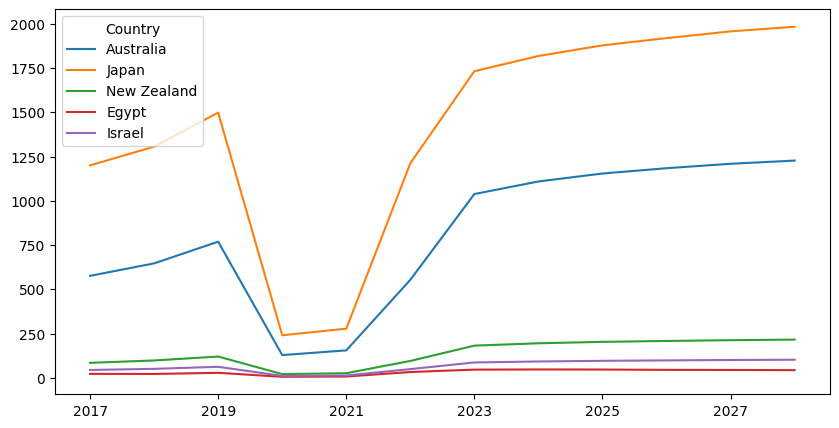

In [12]:
cdf[["Australia", "Japan", "New Zealand", "Egypt", "Israel"]].plot() #The developed countries revenue from 2017-2027

<Axes: >

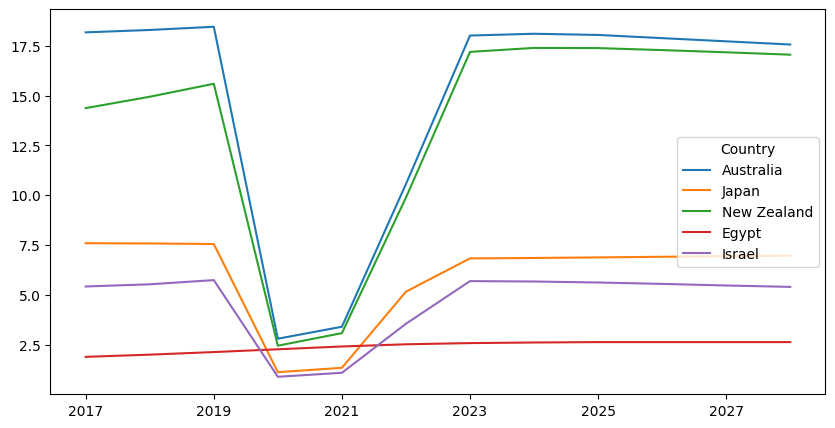

In [13]:
tdf[["Australia", "Japan", "New Zealand", "Egypt", "Israel"]].plot()	#The develped countries users penetration from 2017-2027


<Axes: >

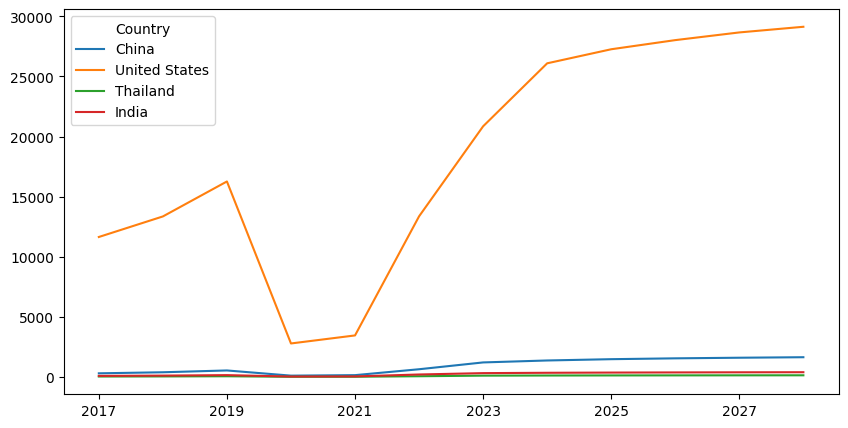

In [14]:
cdf[["China","United States", "Thailand", "India"]].plot() #The revenue on developing country (AU$)

<Axes: >

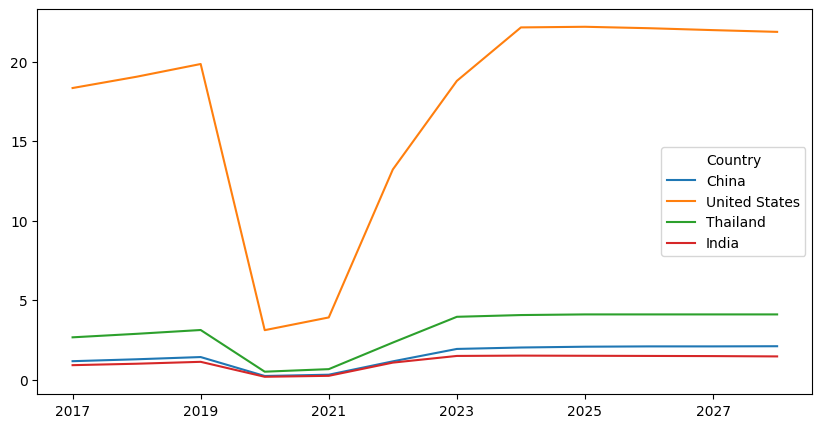

In [15]:
tdf[["China","United States", "Thailand", "India"]].plot() #The developing counties user penetration.(%)

We can also get the list of columns out of the data frame

In [16]:
revenue_df.columns

Index(['Country', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024', '2025', '2026', '2027', '2028'],
      dtype='object')

In [17]:
pen_df.columns

Index(['Country', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024', '2025', '2026', '2027', '2028'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [18]:
row_one = revenue_df.iloc[5]
row_one


Country    Australia
2017           575.9
2018           646.3
2019           768.8
2020           128.3
2021           154.8
2022           553.5
2023          1038.0
2024          1109.0
2025          1154.0
2026          1184.0
2027          1209.0
2028          1227.0
Name: 5, dtype: object

In [19]:
row_one = pen_df.iloc[5]
row_one

Country    Australia
2017           18.17
2018           18.29
2019           18.45
2020             2.8
2021             3.4
2022           10.56
2023           18.01
2024            18.1
2025           18.04
2026           17.88
2027           17.72
2028           17.56
Name: 5, dtype: object

In [20]:
row_one["2020"] #Australia's revenue

2.8

Series objects are _very_ similar to dictionaries. They have more properties though.

In [21]:
row_one = revenue_df.iloc[38]
row_one

Country    Egypt
2017       22.08
2018       21.59
2019       27.93
2020        5.64
2021        7.11
2022       32.49
2023       46.05
2024       46.94
2025       46.56
2026       44.77
2027       44.13
2028       43.21
Name: 38, dtype: object

In [22]:
row_one = revenue_df.iloc[68]
row_one

Country     Japan
2017       1200.0
2018       1306.0
2019       1498.0
2020        240.1
2021        277.3
2022       1212.0
2023       1732.0
2024       1818.0
2025       1878.0
2026       1919.0
2027       1957.0
2028       1983.0
Name: 68, dtype: object

In [23]:
row_one = revenue_df.iloc[95]
row_one

Country    New Zealand
2017             84.48
2018             97.73
2019             120.0
2020              20.7
2021             25.82
2022             95.12
2023             181.6
2024             194.9
2025             202.9
2026             208.0
2027             212.4
2028             215.6
Name: 95, dtype: object

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [24]:
row_one["2023"]  #New Zealand's 2023

181.6

Doing the same thing on a dataframe gives us the whole column

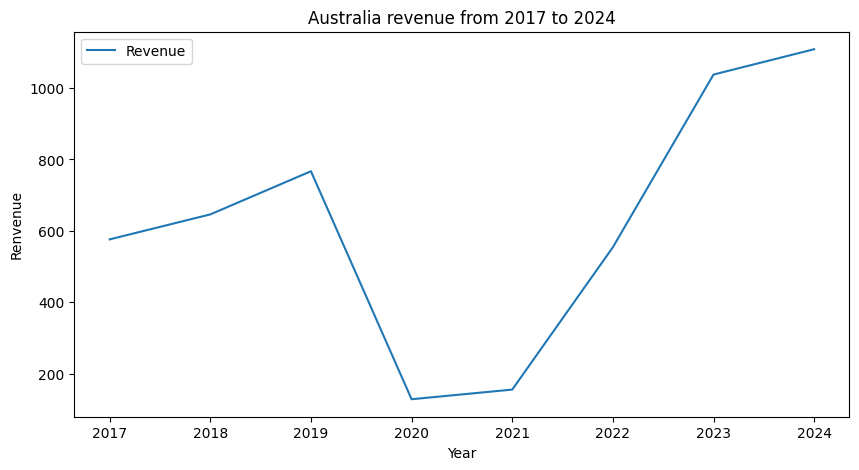

In [25]:
data={"Year":['2017', '2018', '2019', '2020','2021', '2022','2023','2024'],"Revenue":[576, 646, 767, 128, 155, 554, 1038, 1109]}
df = pd.DataFrame(data)
ax = df.plot(kind='line',x='Year',y='Revenue')
ax.set_xlabel('Year')
ax.set_ylabel('Renvenue')
ax.set_title("Australia revenue from 2017 to 2024")
plt.show()


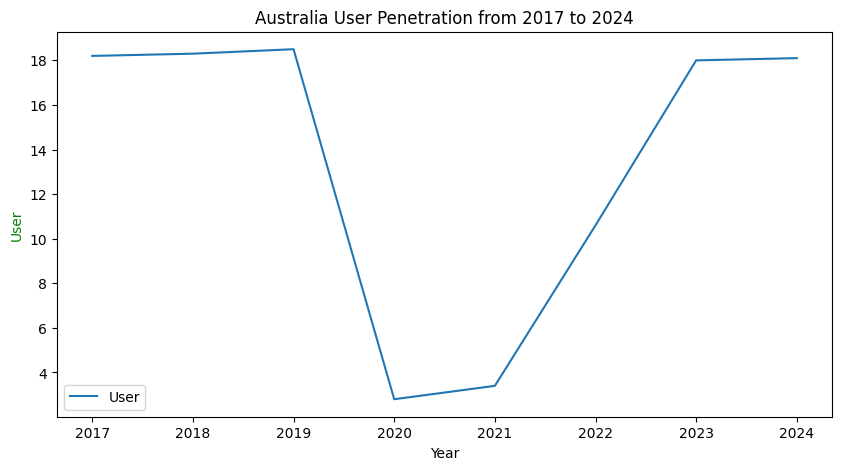

In [26]:
data={"Year":['2017', '2018', '2019', '2020','2021', '2022','2023','2024'],"User":[18.2, 18.3, 18.5, 2.8, 3.4, 10.6, 18.0, 18.1]}
df = pd.DataFrame(data)
ax = df.plot(kind='line',x='Year',y='User')
ax.set_xlabel('Year')
ax.set_ylabel('User',color="Green")
ax.set_title("Australia User Penetration from 2017 to 2024")
plt.show()

In [27]:
cdf.columns

Index(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan', 'Vietnam', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country', length=149)

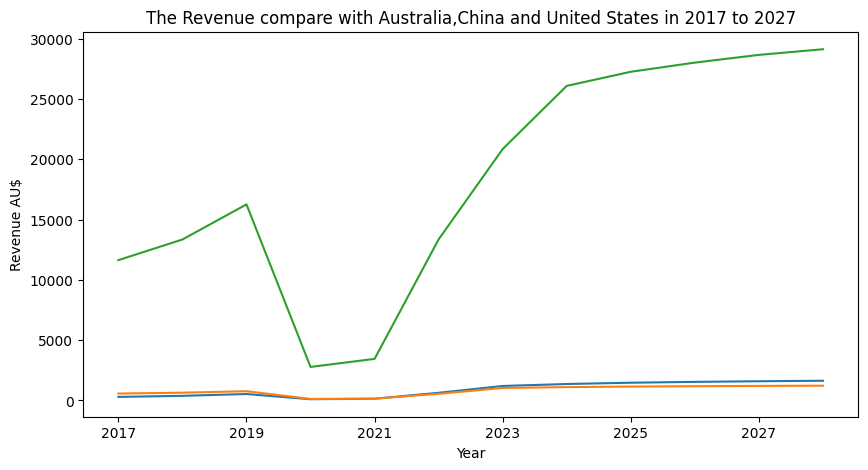

In [28]:
cdf["China"].plot()
cdf["Australia"].plot()
cdf["United States"].plot()
plt.xlabel("Year")
plt.ylabel("Revenue AU$")
plt.title("The Revenue compare with Australia,China and United States in 2017 to 2027")
plt.show()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

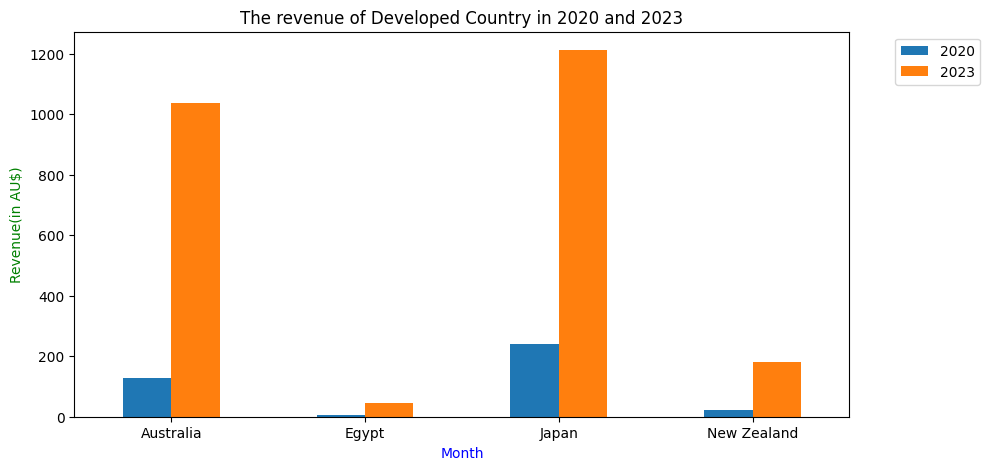

In [29]:
df1 = pd.DataFrame({"Country":['Australia','Egypt','Japan','New Zealand'], "2020":[128.30, 5.64, 240.10, 20.70]})
df2 = pd.DataFrame({"Country":['Australia','Egypt','Japan','New Zealand'], "2023":[1038.0, 46.05, 1212.0, 181.60]})
df=pd.merge(df1, df2, on='Country')
ax=df.plot(kind='bar',x='Country',logy=False, rot=0)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Month',color='blue')
ax.set_ylabel('Revenue(in AU$)',color='Green')
ax.set_title("The revenue of Developed Country in 2020 and 2023")
plt.show()




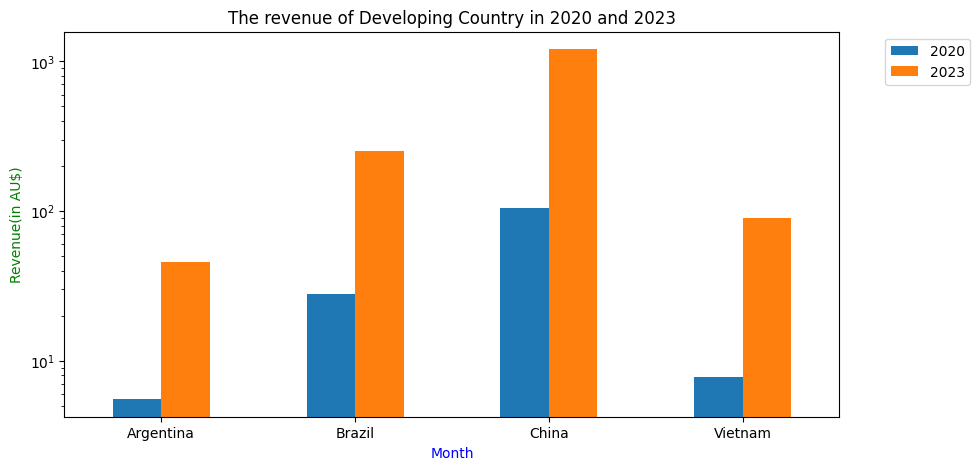

In [30]:
df1 = pd.DataFrame({"Country":['Argentina','Brazil','China','Vietnam'], "2020":[5.54, 27.8, 104.5, 7.82]})
df2 = pd.DataFrame({"Country":['Argentina','Brazil','China','Vietnam'], "2023":[45.55, 250.5, 1204.0, 89.46]})
df=pd.merge(df1, df2, on='Country')
ax=df.plot(kind='bar',x='Country',logy=True, rot=0)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Month',color='blue')
ax.set_ylabel('Revenue(in AU$)',color='Green')
ax.set_title("The revenue of Developing Country in 2020 and 2023")
plt.show()

In [31]:
tdf.columns

Index(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan', 'Vietnam', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country', length=149)

Text(0.5, 1.0, 'The Global Revenue in 2021')

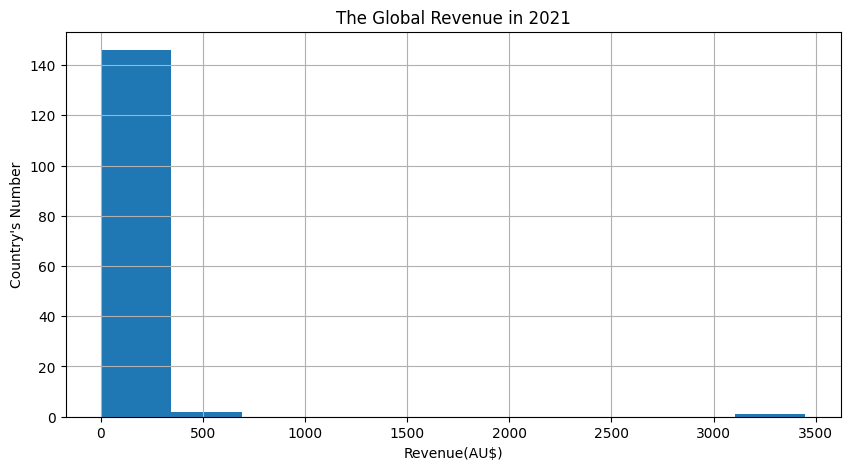

In [32]:
revenue_df["2021"].hist()
plt.xlabel("Revenue(AU$)")
plt.ylabel("Country's Number")
plt.title("The Global Revenue in 2021")

Text(0.5, 1.0, 'The User Penetration in 2021')

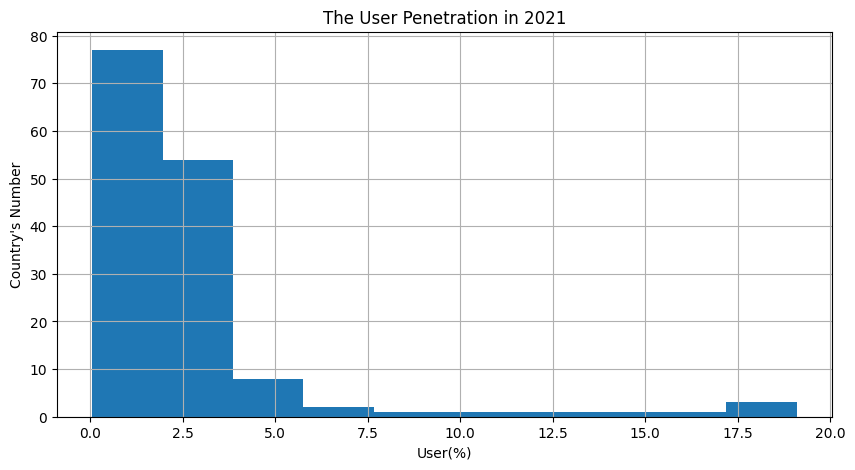

In [33]:
pen_df["2021"].hist()
plt.xlabel("User(%)")
plt.ylabel("Country's Number")
plt.title("The User Penetration in 2021")

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, _boolean indexing_:

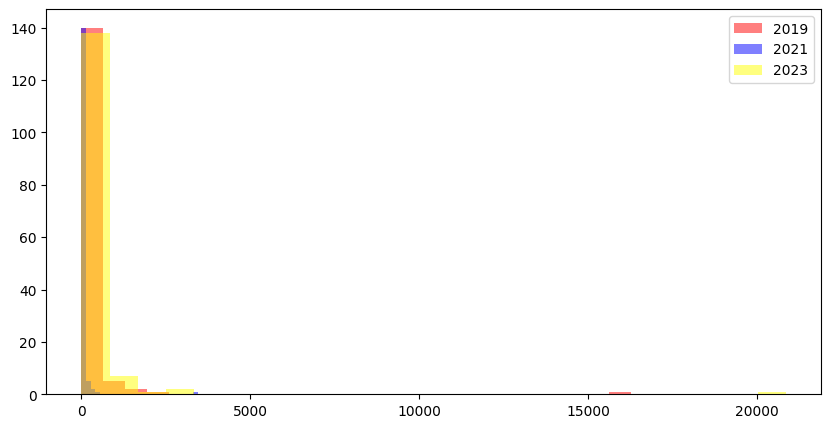

In [34]:
df = revenue_df
plt.hist(df['2019'],bins = 25, alpha = 0.5, color = 'red') 
plt.hist(df['2021'],bins = 25, alpha = 0.5, color = 'blue') 
plt.hist(df['2023'],bins = 25, alpha = 0.5, color = 'yellow') 
plt.legend(['2019','2021','2023']) 
plt.show() 


That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [35]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
revenue_df = pd.Series(range(100))
revenue_df.head()


0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [36]:
revenue_df[revenue_df < 180]

0      0
1      1
2      2
3      3
4      4
      ..
95    95
96    96
97    97
98    98
99    99
Length: 100, dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [37]:
revenue_df[(revenue_df < 10) | (revenue_df >= 300)]
# this needs the round brackets, not really sure why.


0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

We can be _really fancy_ too!  Allow me to introduce the:

# 🎺 List comprehension 🎺

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [38]:
pets = ["Australia","Austria","Brazil","Canada","China","Colombia","Cuba","Egypt","France"]

pets_series = pd.Series(pets)
pattern_of_bools = [("n" in pet_name) for pet_name in pets_series]
print("pattern:",pattern_of_bools)

pets_series[pattern_of_bools]

pattern: [False, False, False, True, True, False, False, False, True]


3    Canada
4     China
8    France
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [39]:
pets_we_care_about = []
for this_pet in pets:
    if len(this_pet) == 4:
        pets_we_care_about.append(this_pet)
pets_we_care_about


['Cuba']

This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [40]:
[p for p in pets]

['Australia',
 'Austria',
 'Brazil',
 'Canada',
 'China',
 'Colombia',
 'Cuba',
 'Egypt',
 'France']

This one converts the list to uppercase while it's doing the transfer

In [41]:
[p.upper() for p in pets]

['AUSTRALIA',
 'AUSTRIA',
 'BRAZIL',
 'CANADA',
 'CHINA',
 'COLOMBIA',
 'CUBA',
 'EGYPT',
 'FRANCE']

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [42]:
[p for p in pets if len(p) == 4]


['Cuba']

And this one is doing both

In [43]:
[p.upper() for p in pets if len(p) == 5]


['CHINA', 'EGYPT']

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

Let's add one more thing too, to make these graphs less garbage 🗑, a title.

Let's see what's under $1000

Text(0.5, 1.0, 'All percent under 10%')

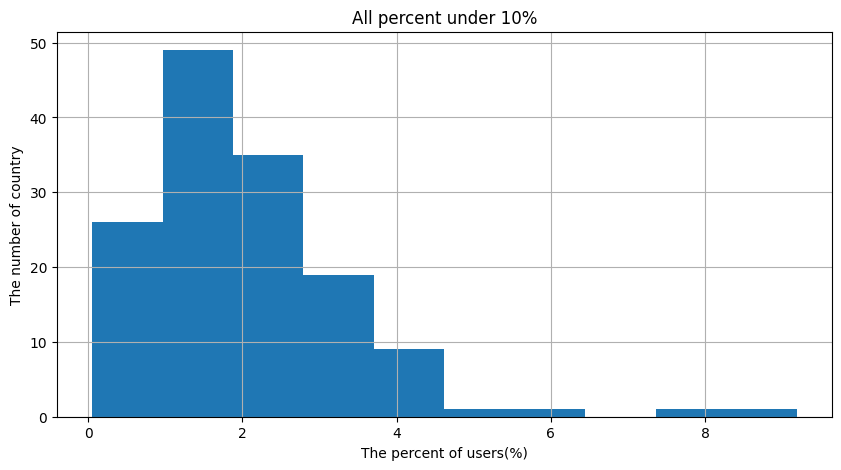

In [44]:
upper_bound = 10
pen_df["2021"][pen_df["2021"]< upper_bound].hist()
plt.xlabel(f"The percent of users(%)")
plt.ylabel(f"The number of country")
plt.title(f"All percent under {upper_bound}%")
#The user penetration in the world.


This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [45]:
pen_df.head(18)

,Country,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Albania,1.65,1.73,1.83,1.94,2.04,2.12,2.17,2.19,2.20,2.20,2.21,2.21
1,Algeria,2.23,2.37,2.53,2.72,2.90,3.03,3.09,3.11,3.12,3.12,3.12,3.12
2,Angola,2.67,2.92,3.22,3.55,3.88,4.19,4.47,4.70,4.89,5.04,5.16,5.28
3,Argentina,1.95,1.98,2.00,0.30,0.36,1.17,1.86,1.85,1.84,1.83,1.81,1.80
4,Armenia,1.80,1.92,2.05,2.20,2.35,2.47,2.54,2.58,2.60,2.61,2.61,2.61
5,Australia,18.17,18.29,18.45,2.80,3.40,10.56,18.01,18.10,18.04,17.88,17.72,17.56
6,Austria,15.52,15.88,16.36,2.53,3.11,12.34,16.60,16.80,16.90,16.93,16.93,16.92
7,Azerbaijan,2.30,2.48,2.69,2.92,3.15,3.35,3.50,3.61,3.67,3.71,3.73,3.75
8,Bahrain,15.11,15.92,16.89,18.01,19.10,19.84,20.14,20.23,20.25,20.26,20.26,20.26
9,Bangladesh,0.98,1.01,1.05,1.10,1.15,1.19,1.22,1.24,1.26,1.27,1.27,1.28


We can see that `FACE_VALUE` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [46]:
pen_df.value_counts()

Country      2017   2018   2019   2020  2021  2022   2023   2024   2025   2026   2027   2028 
Albania      1.65   1.73   1.83   1.94  2.04  2.12   2.17   2.19   2.20   2.20   2.21   2.21     1
Netherlands  16.31  16.93  17.76  2.80  3.49  11.99  18.91  19.17  19.31  19.35  19.36  19.36    1
Nicaragua    1.03   1.08   1.13   1.20  1.26  1.31   1.35   1.37   1.38   1.38   1.39   1.39     1
Niger        1.09   1.17   1.27   1.37  1.47  1.57   1.65   1.72   1.78   1.82   1.85   1.88     1
Nigeria      0.26   0.28   0.30   0.05  0.06  0.21   0.36   0.36   0.36   0.35   0.34   0.33     1
                                                                                                ..
Ghana        0.92   0.98   1.04   1.11  1.18  1.24   1.27   1.28   1.29   1.29   1.29   1.29     1
Greece       4.64   4.95   5.31   0.86  1.11  5.17   6.49   6.68   6.78   6.82   6.86   6.89     1
Guatemala    1.70   1.77   1.86   1.97  2.08  2.17   2.24   2.30   2.33   2.35   2.36   2.38     1
Guinea       0.

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

<Axes: ylabel='Australia'>

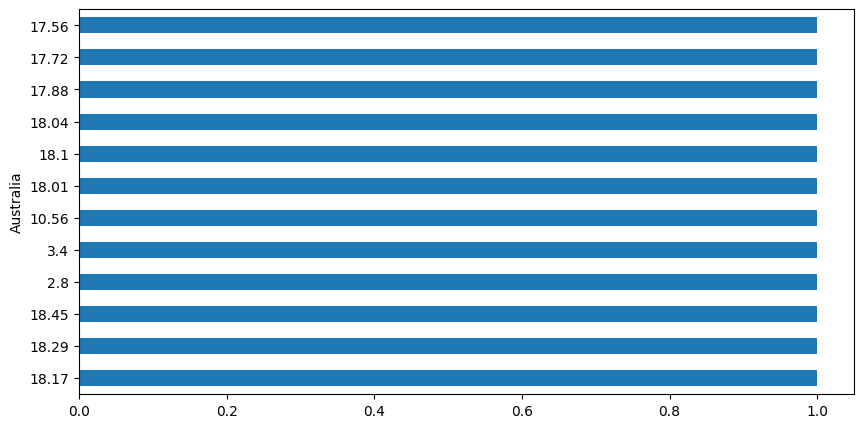

In [47]:
pdvc = tdf["Australia"].value_counts() # This makes a series
pdvc.plot(kind="barh")

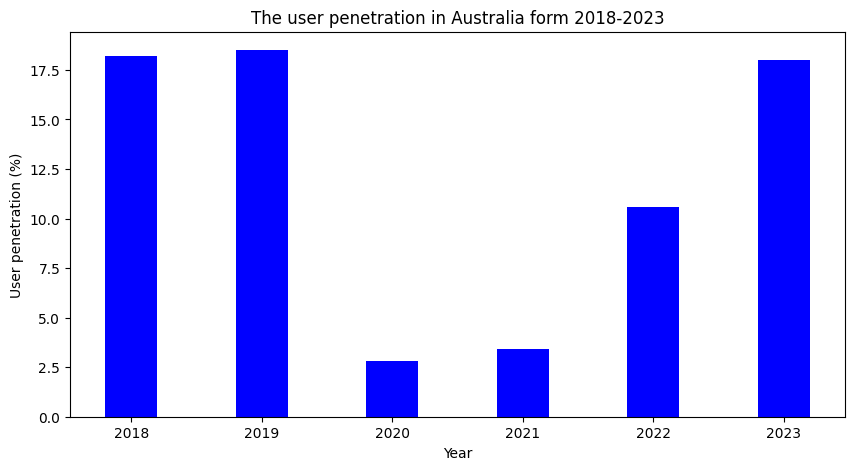

In [48]:

# creating the dataset
data = {'2018':18.2, '2019':18.5, '2020':2.8, '2021':3.4, '2022':10.6, '2023':18.0}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='blue', width = 0.4)

plt.xlabel("Year")
plt.ylabel("User penetration (%)")
plt.title("The user penetration in Australia form 2018-2023")
plt.show()

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) 

from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

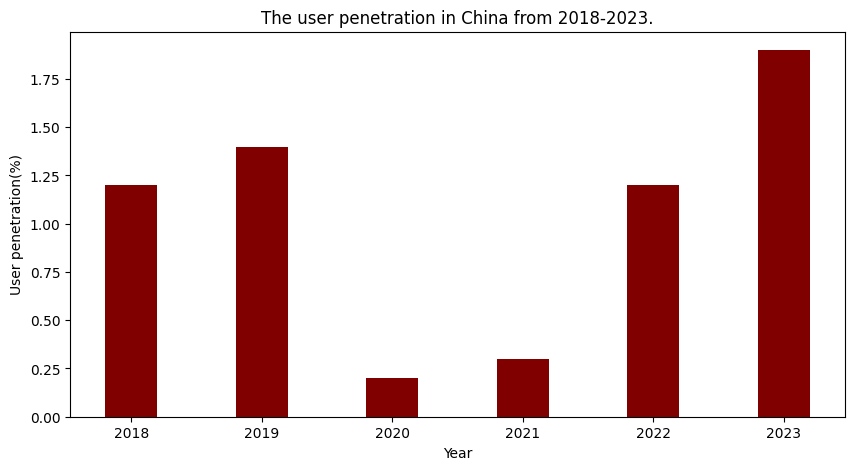

In [49]:
# creating the dataset
data = {'2018':1.2, '2019':1.4, '2020':0.2, '2021':0.3, '2022':1.2, '2023':1.9}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(courses, values, color ='maroon', width = 0.4)

plt.xlabel("Year")
plt.ylabel("User penetration(%)")
plt.title("The user penetration in China from 2018-2023.")
plt.show()


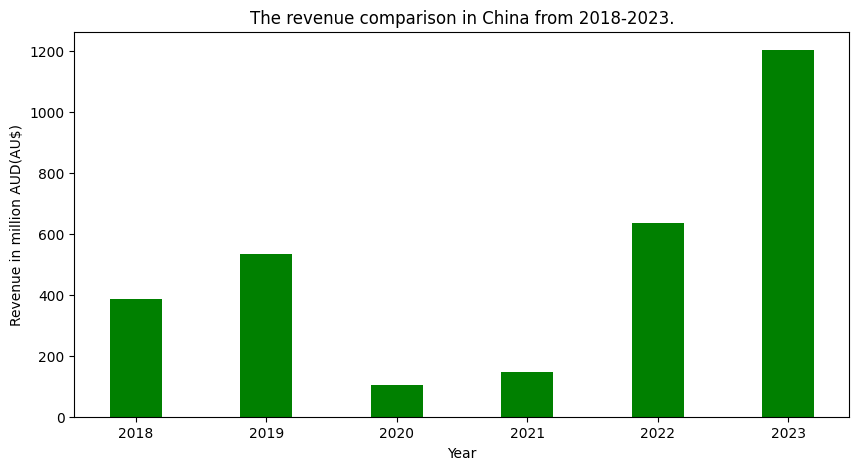

In [50]:
data = {'2018':385.3, '2019':535.8, '2020':104.5, '2021':145.5, '2022':636.6, '2023':1204}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color ='green', width = 0.4)

plt.xlabel("Year")
plt.ylabel("Revenue in million AUD(AU$)")
plt.title("The revenue comparison in China from 2018-2023.")
plt.show()

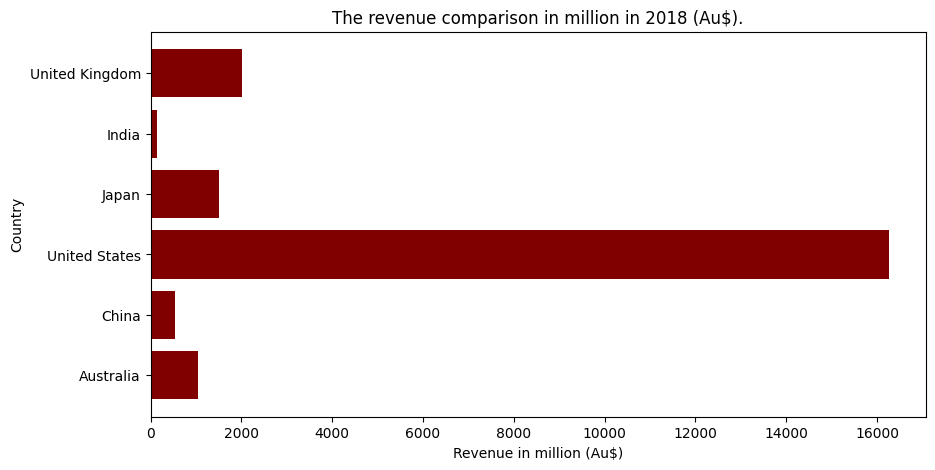

In [51]:
data = {'Australia':1038, 'China':535.80, 'United States':16260, 'Japan':1498, 'India':147.20, 'United Kingdom':2013} #2018
values = list(data.values())
courses = list(data.keys())
fig = plt.figure(figsize = (10, 5))

plt.barh(courses, values, color ='maroon')
plt.xlabel("Revenue in million (Au$)")
plt.ylabel("Country")
plt.title("The revenue comparison in million in 2018 (Au$).")
plt.show()

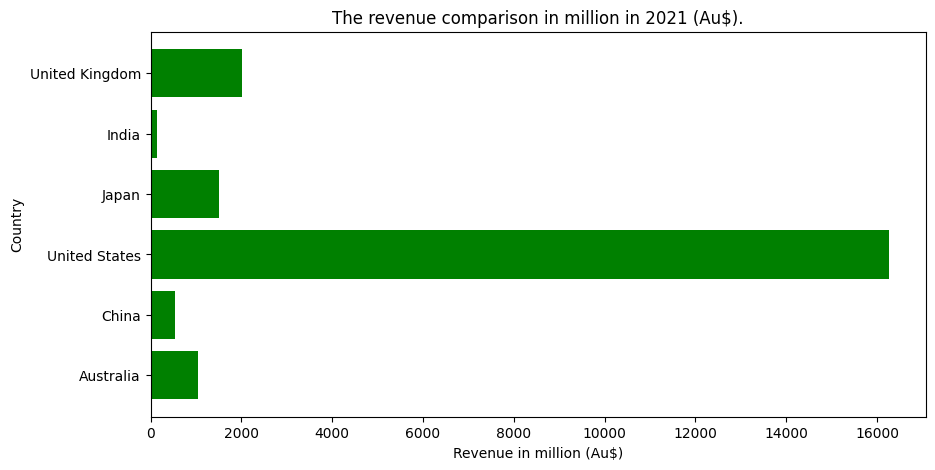

In [52]:
data2 = {'Australia':154.8, 'China':145.5, 'United States':3450, 'Japan':277.3, 'India':39.2, 'United Kingdom':415.7} #2021
values = list(data.values())
courses = list(data.keys())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.barh(courses, values, color ='green')
plt.xlabel("Revenue in million (Au$)")
plt.ylabel("Country")
plt.title("The revenue comparison in million in 2021 (Au$).")
plt.show()

This pattern keeps repeating itself:

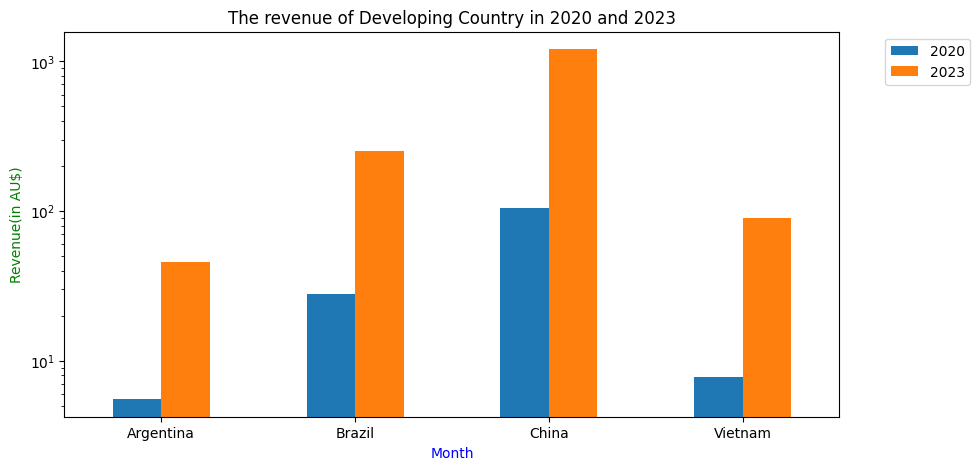

In [53]:
df1 = pd.DataFrame({"Country":['Argentina','Brazil','China','Vietnam'], "2020":[5.54, 27.8, 104.5, 7.82]})
df2 = pd.DataFrame({"Country":['Argentina','Brazil','China','Vietnam'], "2023":[45.55, 250.5, 1204.0, 89.46]})
df=pd.merge(df1, df2, on='Country')
ax=df.plot(kind='bar',x='Country',logy=True, rot=0)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Month',color='blue')
ax.set_ylabel('Revenue(in AU$)',color='Green')
ax.set_title("The revenue of Developing Country in 2020 and 2023")
plt.show()

<Axes: >

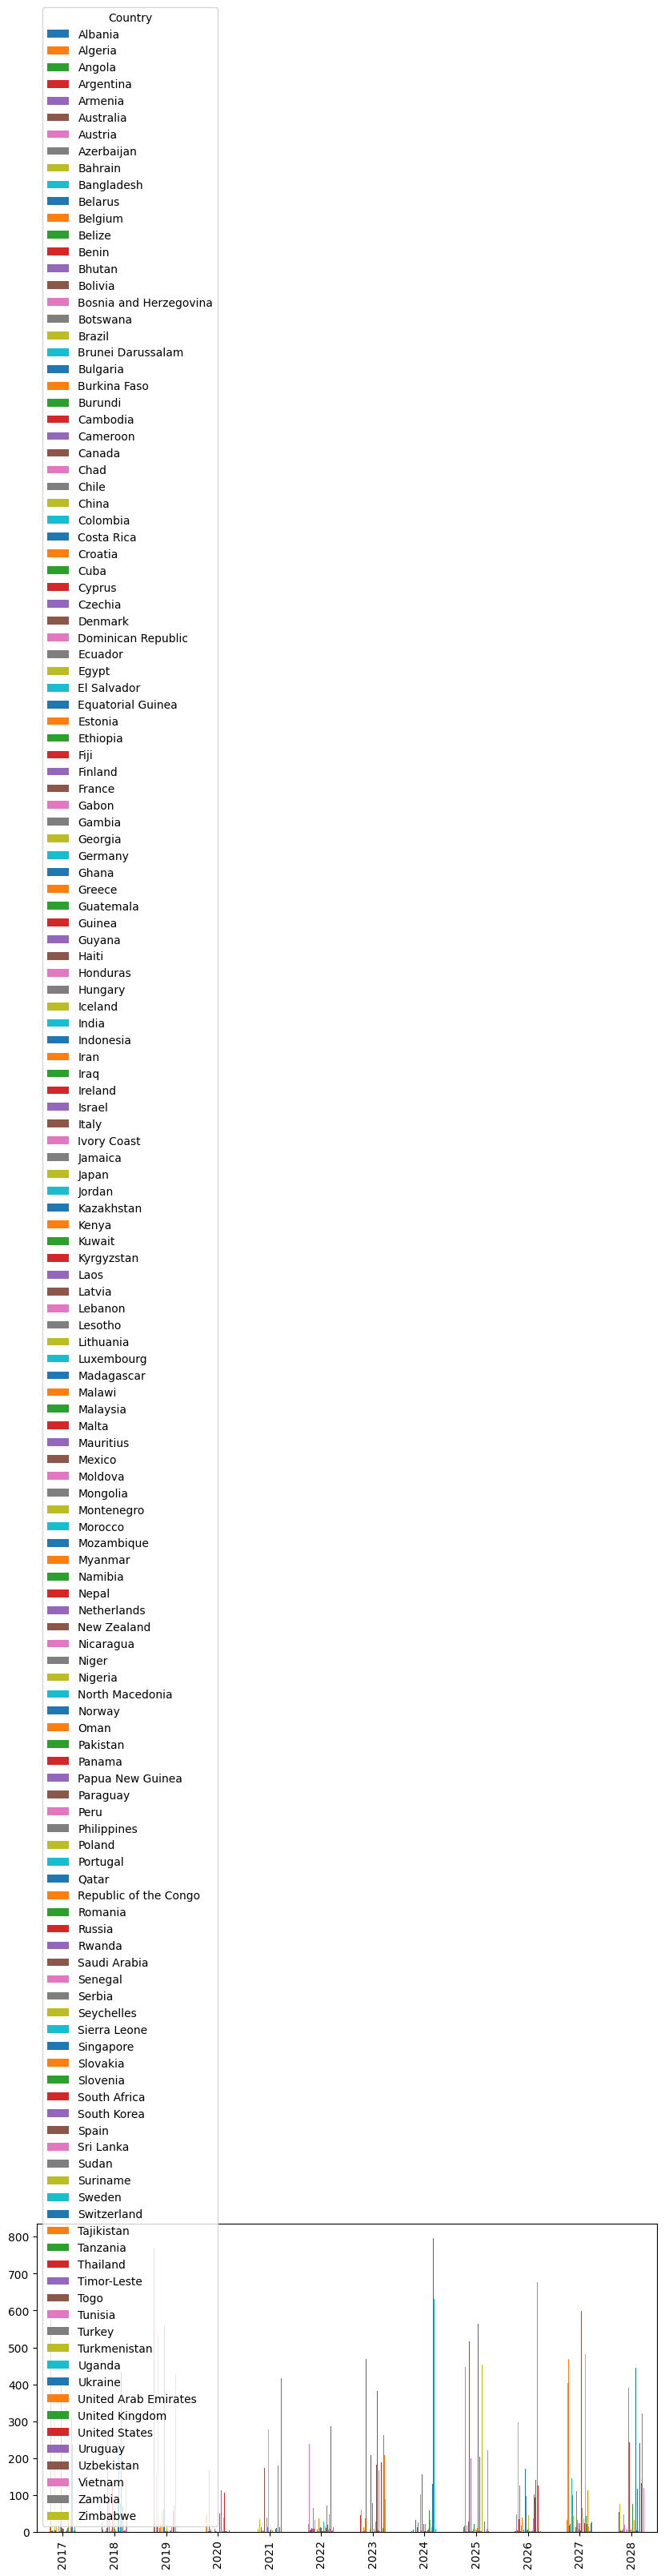

In [54]:
cdf[cdf < 800].plot(kind="bar")


There are a bunch of _keyword arguments_ that you can give to the `plot` function. In this case, let's flip it on into its side so we can read the labels more easily:

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [55]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)


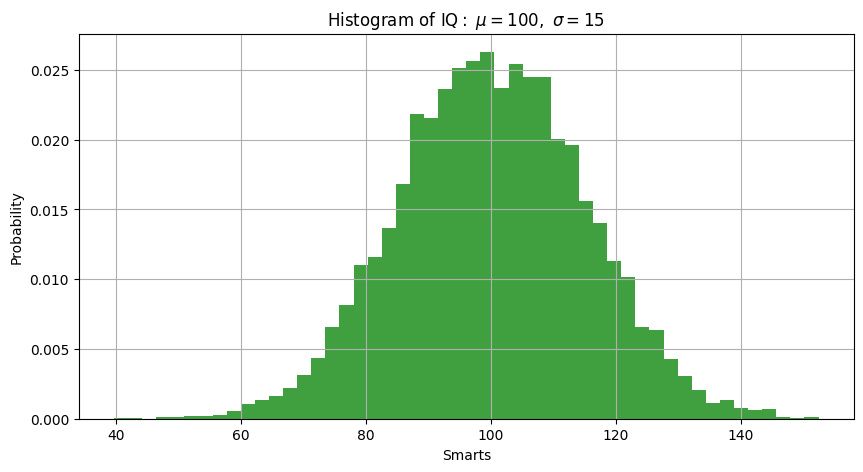

In [56]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()


Here's how we made our histogram before:

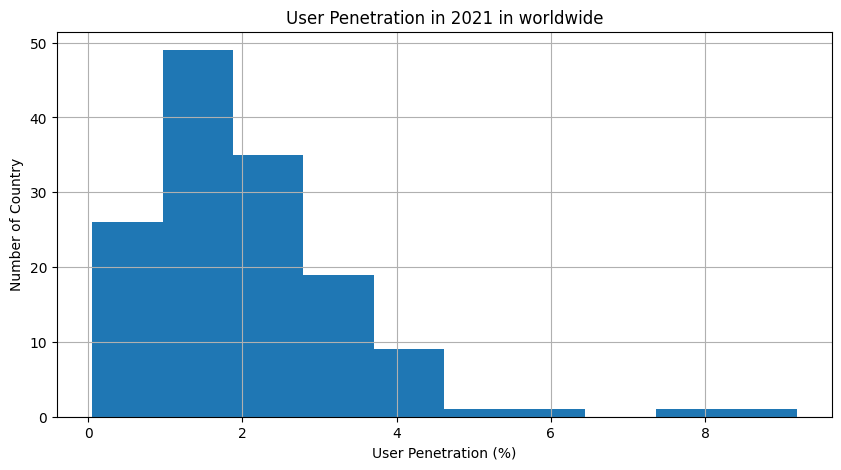

In [57]:
pen_df["2021"][pen_df["2021"] < 10].hist() 
plt.xlabel("User Penetration (%)")
plt.ylabel("Number of Country")
plt.title("User Penetration in 2021 in worldwide")
plt.show()


This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

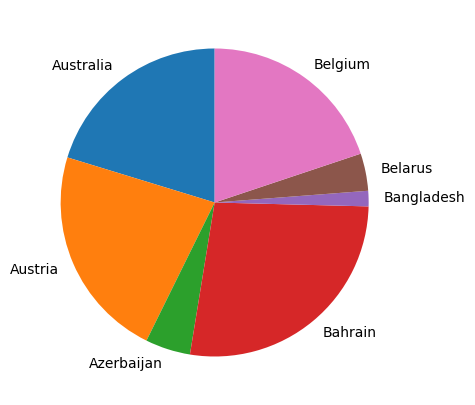

In [58]:
y = [15, 16.6, 3.5, 20.1, 1.2, 2.9, 14.7]
labels = ["Australia", "Austria", "Azerbaijan", "Bahrain", "Bangladesh", "Belarus", "Belgium"]

fig,ax=plt.subplots()
ax.pie(y, labels =labels, startangle=90)
plt.show()


Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

In [59]:
capped_face_value_data = cdf.China[cdf["China"]] < 1000

# We can keep adding things to this plot to see what's going on.
plt.hist(capped_face_value_data, bins=10, facecolor="blue", alpha=0.2)  # <-old one
plt.hist(capped_face_value_data, bins=50, facecolor="green", alpha=1)  # <-new one
plt.show()


KeyError: "None of [Index([ 297.7,  385.3,  535.8,  104.5,  145.5,  636.6, 1204.0, 1366.0, 1474.0,\n       1544.0, 1595.0, 1637.0],\n      dtype='float64')] are in the [index]"

We can go back to our initial, unfiltered, data:

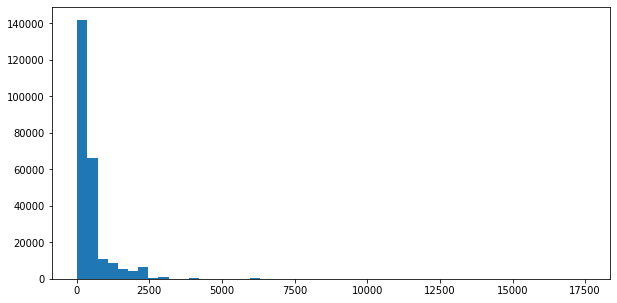

In [ ]:
plt.hist(penalty_data.FACE_VALUE, bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

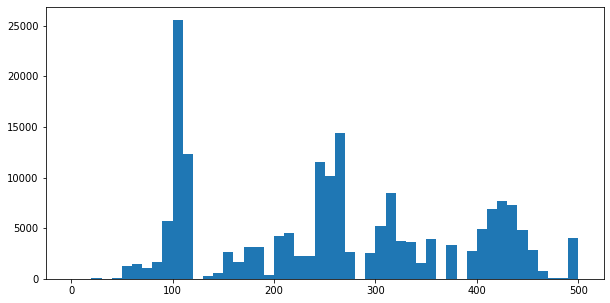

In [ ]:
plt.hist(penalty_data["FACE_VALUE"], bins=50, range=(0, 500))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

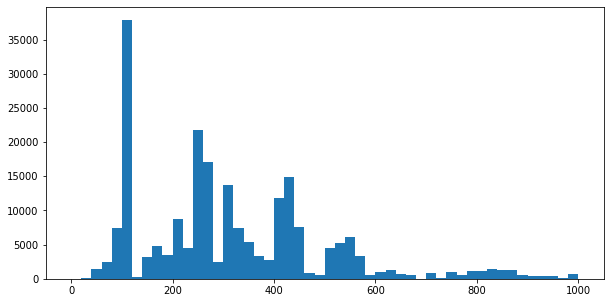

In [ ]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(
    penalty_data.FACE_VALUE,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()


This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

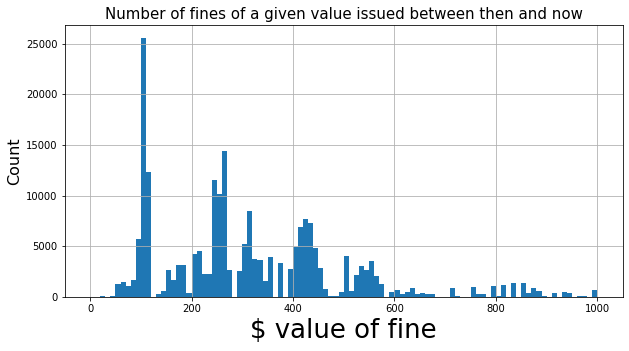

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data.FACE_VALUE, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued in this period", fontsize=15)
plt.xlabel("$ value of fine", fontsize=26)
plt.ylabel("Count", fontsize=16)
plt.grid(True)
plt.show()


We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [ ]:
penalty_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["OFFENCE_MONTH"],
    dayfirst=True,
)
penalty_data.head(2)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,RED_LIGHT_CAMERA_IND,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238
1,2011-2012,2011-07-01,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,78,20670


This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [ ]:
first_date = penalty_data.OFFENCE_MONTH.min()
last_date = penalty_data.OFFENCE_MONTH.max()
f"range is: {first_date} to {last_date}"


'range is: 2011-07-01 00:00:00 to 2017-02-01 00:00:00'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [ ]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.min(), date_format_pattern)
latest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"


'range is: July, 2011 to February, 2017'

Which means that we can put those values into our graph title:

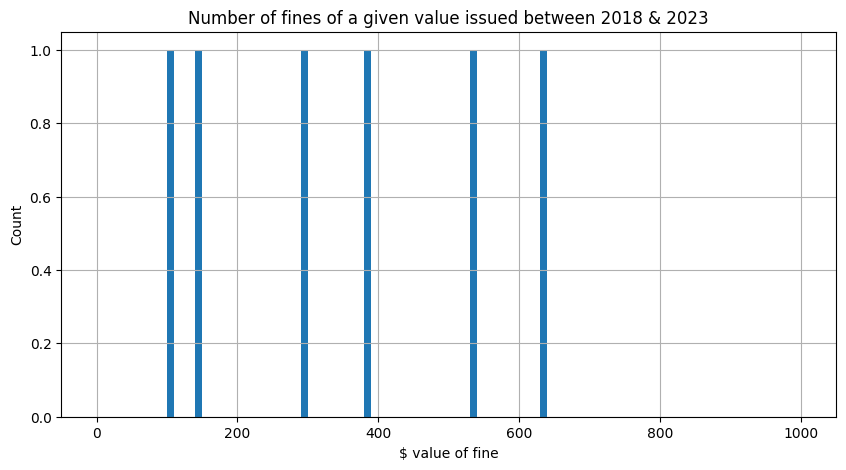

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(
    cdf["China"], bins=number_of_bins, range=(lower_bound, upper_bound)
)
plt.title(
    f"Number of fines of a given value issued between {2018} & {2023}",
    fontsize=12,
)
plt.xlabel("$ value of fine", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.grid(True)
plt.show()


We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

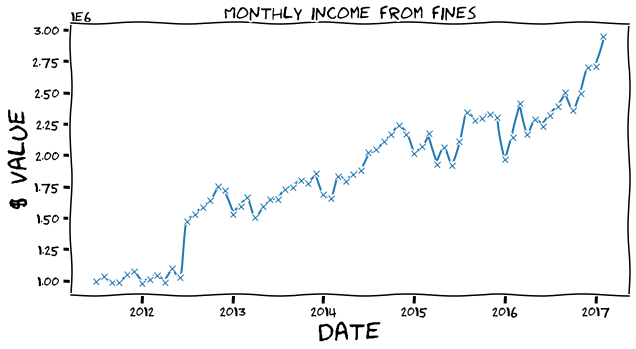

In [ ]:
income = penalty_data[["OFFENCE_MONTH", "FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel("Date", fontsize=26)
plt.ylabel("$ Value", fontsize=26)
plt.grid(True)
plt.show()


In [ ]:
matplotlib.rcParams.update(
    saved_style_state
)  # revert to regular matplotlib styles, not xkcd


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940:

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [ ]:
ss = penalty_data.loc[:5]


Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [ ]:
ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(2)


<ipython-input-191-beb3bd65b756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,46,16238,1,1
1,2011-2012,2011-07-01,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,Y,NaN,NaN,NaN,78,20670,1,1


Above is equivalent to below, it's up to you to decide what is more readable.

In [ ]:
def my_f(x):
    return x.OFFENCE_MONTH.day


ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)


<ipython-input-192-ebf8f59cf10c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_function"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda,day_from_function
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,46,16238,1,1,1


Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)


<ipython-input-194-e3cd89590808>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["nice_day"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda,day_from_function,nice_day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,46,16238,1,1,1,Friday


Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

<AxesSubplot:>

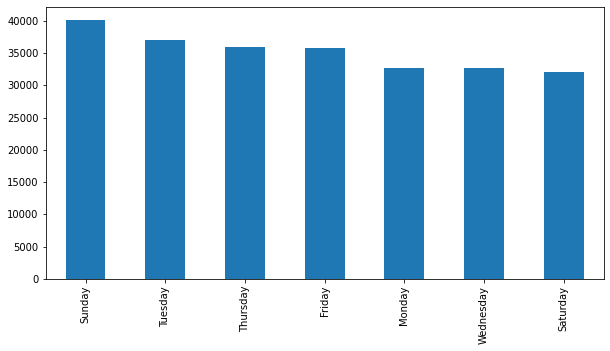

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


penalty_data["nice_day"] = penalty_data.apply(my_f, axis=1)
penalty_data.nice_day.value_counts().plot(kind="bar")


And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [ ]:
def fold(given):
    """Return canonical versions of inputs."""

    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickhead!": ben_name_cannonical,
    }

    #     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)


print(fold("New-south"))
print(fold("BDoh"))


uni of stairs
Ben Doherty


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_